In [63]:
# Imports

# Primary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import datetime

# Dependency Imports
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

# Script Imports
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

# R4 Data Science Exercise
Author: Chaz Frazer

## Scope

#### Data Columns:
1. ID (user ID)
2. First_Play_Date (date user first used service)
3. Play_Date (date of play/stream)
4. Genre (genre of portal being played)

### Questions

#### Question A:
What are some of the first things you notice about this data set? What is in it?
- Rows contain user IDs containing the first initial play date, as well as each subsequent client access of the service. We can see that there are 2798 unique user IDs using the service.
- 6 unique genres of:
    - Bullseye (1183 appearances, 435 unique IDs)
    - Discovery (105489 appearences, 2519 unique IDs)
    - Fingerprint (21802 appearences, 1959 unique IDs)	
    - Mashboard (2339 appearences, 592 unique IDs)
    - Product (2711 appearences, 451 unique IDs)
    - Spider (1426 appearences,	609 unique IDs)
- User ID (WMT-eb43dc75-8c60-487c-9615-4e750042a0e3-26930-7f412b5358c1bbab7a1b8356f2794c7ee30fc26) has the highest number of games, having played Discovery 1077 times.

#### Question B:
Using this data, please answer the question-  does genre usage shift week-to-week (relative to when a user first used the service)?  For example, are users more likely to play Fingerprint during week one of their subscription, but then Mashboard during week 2 and 3? 
- Users are most likely to start off with Discovery, then in week 2 move on to Fingerprint in leading up to and during week 2. After week 2, Discovery plays drop off sharply, while Fingerprint playthroughs taper off slightly. Other game genres mostly hold steady throughout the subsequent weeks.

#### Question C:
How would you improve the service by improving customer engagement? 
- Provide incentives for playthoughs of each genre, specific to the game. For example: create leaderboards, viewable stat data of their closest peers, discord servers for game genres where a community can grow; including developer interaction, and in-game challenges that reap trophies or awards specific to gameplay tasks.

## Data Import & Cleaning

In [32]:
# Read in Dataframe
r4 = pd.read_csv('data/r4_data_exercise.csv')

In [33]:
r4.head(10)

,ID,First_Play_Date,Play_Date,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
5,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
6,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
7,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
8,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN
9,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,08Jan2015,08Jan2015,Discovery,NaN,NaN,NaN,NaN,NaN


In [34]:
# Checking data types of the dataframe
r4.dtypes

ID                  object
First_Play_Date     object
Play_Date           object
Genre               object
Unnamed: 4         float64
Unnamed: 5         float64
Unnamed: 6         float64
Unnamed: 7         float64
Unnamed: 8         float64
dtype: object

In [35]:
# Dropping unused columns and NaN values
r4.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis = 1, inplace = True)
r4.dropna(inplace = True)

In [42]:
# Confirming the shape of our dataframe and that there are no more NaN values
r4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134950 entries, 0 to 134949
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               134950 non-null  object
 1   First_Play_Date  134950 non-null  object
 2   Play_Date        134950 non-null  object
 3   Genre            134950 non-null  object
dtypes: object(4)
memory usage: 5.1+ MB


In [44]:
# Converting date to datetime objects for time manipulation and EDA
r4['First_Play_Date'] = pd.to_datetime(r4['First_Play_Date'])
r4['Play_Date'] = pd.to_datetime(r4['Play_Date'])
r4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134950 entries, 0 to 134949
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               134950 non-null  object        
 1   First_Play_Date  134950 non-null  datetime64[ns]
 2   Play_Date        134950 non-null  datetime64[ns]
 3   Genre            134950 non-null  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 5.1+ MB


In [45]:
# Confirming final dataframe shape and attributes
r4.head()

,ID,First_Play_Date,Play_Date,Genre
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery


## Feature Engineering

In [128]:
# Creating new columns to track numerical data of games played by genre, by play date 
r4['bullseye_plays'] = np.where((r4['Genre'] == 'Bullseye'), 1, 0)
r4['discovery_plays'] = np.where((r4['Genre'] == 'Discovery'), 1, 0)
r4['fingerprint_plays'] = np.where((r4['Genre'] == 'Fingerprint'), 1, 0)
r4['mashboard_plays'] = np.where((r4['Genre'] == 'Mashboard'), 1, 0)
r4['product_plays'] = np.where((r4['Genre'] == 'Product'), 1, 0)
r4['spider_plays'] = np.where((r4['Genre'] == 'Spider'), 1, 0)

In [129]:
r4.head()

,ID,First_Play_Date,Play_Date,Genre,bullseye_plays,discovery_plays,fingerprint_plays,mashboard_plays,product_plays,spider_plays
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768-6d9d2b9c3e3cdc8e7a57d5f851e7faf44163f8d,2015-01-08,2015-01-08,Discovery,0,1,0,0,0,0
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768-6d9d2b9c3e3cdc8e7a57d5f851e7faf44163f8d,2015-01-08,2015-01-08,Discovery,0,1,0,0,0,0
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768-6d9d2b9c3e3cdc8e7a57d5f851e7faf44163f8d,2015-01-08,2015-01-08,Discovery,0,1,0,0,0,0
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768-6d9d2b9c3e3cdc8e7a57d5f851e7faf44163f8d,2015-01-08,2015-01-08,Discovery,0,1,0,0,0,0
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768-6d9d2b9c3e3cdc8e7a57d5f851e7faf44163f8d,2015-01-08,2015-01-08,Discovery,0,1,0,0,0,0


## EDA

In [53]:
# Checking the unique number of IDs, thus the count of client-side access
unique_users = len(pd.unique(r4['ID']))
print(f'Number of unique users is: {unique_users}')

# Checking the unique number of Genres
unique_genres = len(pd.unique(r4['Genre']))
print(f'Number of unique genres is: {unique_genres}')

Number of unique users is: 2798
Number of unique genres is: 6


In [112]:
# Checking the First Play Date values in the dataframe
np.sort(r4['First_Play_Date'].unique())

array(['2015-01-07T00:00:00.000000000', '2015-01-08T00:00:00.000000000',
       '2015-01-09T00:00:00.000000000', '2015-01-10T00:00:00.000000000',
       '2015-01-11T00:00:00.000000000', '2015-01-12T00:00:00.000000000',
       '2015-01-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [113]:
# Checking the Subsequent Play Date values in the dataframe
np.sort(r4['Play_Date'].unique())

array(['2015-01-07T00:00:00.000000000', '2015-01-08T00:00:00.000000000',
       '2015-01-09T00:00:00.000000000', '2015-01-10T00:00:00.000000000',
       '2015-01-11T00:00:00.000000000', '2015-01-12T00:00:00.000000000',
       '2015-01-13T00:00:00.000000000', '2015-01-14T00:00:00.000000000',
       '2015-01-15T00:00:00.000000000', '2015-01-16T00:00:00.000000000',
       '2015-01-17T00:00:00.000000000', '2015-01-18T00:00:00.000000000',
       '2015-01-19T00:00:00.000000000', '2015-01-20T00:00:00.000000000',
       '2015-01-21T00:00:00.000000000', '2015-01-22T00:00:00.000000000',
       '2015-01-23T00:00:00.000000000', '2015-01-24T00:00:00.000000000',
       '2015-01-25T00:00:00.000000000', '2015-01-26T00:00:00.000000000',
       '2015-01-27T00:00:00.000000000', '2015-01-28T00:00:00.000000000',
       '2015-01-29T00:00:00.000000000', '2015-01-30T00:00:00.000000000',
       '2015-01-31T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-02-02T00:00:00.000000000', '2015-02-03

In [122]:
# Exploring the spread of genres across users
r4.groupby('Genre')['ID'].describe()

,count,unique,top,freq
Genre,,,,
Bullseye,1183,435,SBD-405445b7-d087-463f-9d84-3ec48774cbc2-1110-a06646e4f44358aa17a4903ae565f833ef679e5,36
Discovery,105489,2519,WMT-eb43dc75-8c60-487c-9615-4e750042a0e3-26930-7f412b5358c1bbab7a1b8356f2794c7ee30fc26,1077
Fingerprint,21802,1959,ONG-47ee5eef-b687-4707-bf58-2c7bc094041f-29682-93665e4dc033e944a854d5755e29d4a4262f3d1,174
Mashboard,2339,592,P158-4a478455-dcaf-4c4f-b325-fecb7a161b20-25-a70dee78befeec153f04b80b6b9088f45577856,48
Product,2711,451,P158-9fc39447-ef30-4e95-8f3c-73aa5e991169-421-b556d2b8b3e195395eb5ab1a17c907165e85da4,78
Spider,1426,609,P158-81ee652f-623a-4a49-8abb-b907933b1916-3158-9a9b530229916d9e2a491eaa16f171d22ddd6c7,39


In [74]:
# Viewing grouping of genre play counts by ID
r4.groupby('Genre')['ID'].count()

Genre
Bullseye         1183
Discovery      105489
Fingerprint     21802
Mashboard        2339
Product          2711
Spider           1426
Name: ID, dtype: int64

In [117]:
# View first initial play dates by daily breakdown
daily_first_play = r4.groupby('Genre')['First_Play_Date'].describe()
daily_first_play.head()

,count,unique,top,freq,first,last
Genre,,,,,,
Bullseye,1183,7,2015-01-13,208,2015-01-07,2015-01-13
Discovery,105489,7,2015-01-07,20247,2015-01-07,2015-01-13
Fingerprint,21802,7,2015-01-07,3639,2015-01-07,2015-01-13
Mashboard,2339,7,2015-01-07,451,2015-01-07,2015-01-13
Product,2711,7,2015-01-09,440,2015-01-07,2015-01-13


In [120]:
# View daily breakdown of first and last play dates
daily_plays = r4.groupby('Genre')['Play_Date'].describe()
daily_plays.head()

,count,unique,top,freq,first,last
Genre,,,,,,
Bullseye,1183,34,2015-01-15,83,2015-01-07,2015-02-09
Discovery,105489,34,2015-01-14,6325,2015-01-07,2015-02-09
Fingerprint,21802,34,2015-01-13,1392,2015-01-07,2015-02-09
Mashboard,2339,34,2015-01-13,178,2015-01-07,2015-02-09
Product,2711,34,2015-01-10,212,2015-01-07,2015-02-09


In [198]:
# View first play dates by genre breakdown
daily_genre = r4.groupby('First_Play_Date')['bullseye_plays','discovery_plays','fingerprint_plays','mashboard_plays',\
    'product_plays','spider_plays'].sum().reset_index()
daily_genre.head()

,First_Play_Date,bullseye_plays,discovery_plays,fingerprint_plays,mashboard_plays,product_plays,spider_plays
0,2015-01-07,176,20247,3639,451,353,268
1,2015-01-08,174,15027,3221,362,396,209
2,2015-01-09,110,12309,3042,260,440,160
3,2015-01-10,151,12282,2895,389,407,168
4,2015-01-11,172,11711,2333,267,402,132


In [202]:
# View first play dates by genre breakdown
# Index is kept in order to reset for the timeseries object later
sub_daily_genre = r4.groupby('Play_Date')['bullseye_plays','discovery_plays','fingerprint_plays','mashboard_plays',\
    'product_plays','spider_plays'].sum()
sub_daily_genre.head()

,bullseye_plays,discovery_plays,fingerprint_plays,mashboard_plays,product_plays,spider_plays
Play_Date,,,,,,
2015-01-07,10,1069,198,17,27,14
2015-01-08,34,2524,547,104,110,32
2015-01-09,38,3148,769,147,119,39
2015-01-10,45,3769,1087,129,212,27
2015-01-11,43,4133,931,100,159,27


In [200]:
# View total play frequency accounting for first and subsequent plays
play_freq = r4.groupby(['First_Play_Date', 'Play_Date'])['bullseye_plays','discovery_plays','fingerprint_plays','mashboard_plays',\
    'product_plays','spider_plays'].sum()
play_freq.head(10)

bullseye_plays  discovery_plays  \
First_Play_Date Play_Date                                     
2015-01-07      2015-01-07              10             1069   
                2015-01-08              27             1798   
                2015-01-09              14             1238   
                2015-01-10              12             1084   
                2015-01-11               6              900   
                2015-01-12              23              752   
                2015-01-13               8              767   
                2015-01-14               3              802   
                2015-01-15               4              721   
                2015-01-16               4              659   

                            fingerprint_plays  mashboard_plays  product_plays  \
First_Play_Date Play_Date                                                       
2015-01-07      2015-01-07                198               17             27   
                2015-01-08                366               78             60   
                2015-01-09                222               45             24   
                2015-01-10                200               24              3   
                2015-01-11                143               19             18   
                2015-01-12                139                9             14   
                2015-01-13                190                7             19   
                2015-01-14                157               20             10   
                2015-01-15                124               11             13   
                2015-01-16                114               10              9   

                            spider_plays  
First_Play_Date Play_Date                 
2015-01-07      2015-01-07            14  
                2015-01-08            22  
                2015-01-09             8  
                2015-01-10             5  
                2015-01-11             4  
                2015-01-12             0  
                2015-01-13             0  
                2015-01-14             7  
                2015-01-15             9  
                2015-01-16            10

In [203]:
# View first play dates by genre breakdown
genre_weekly = sub_daily_genre.resample('W').sum().reset_index()
genre_weekly.head()

,Play_Date,bullseye_plays,discovery_plays,fingerprint_plays,mashboard_plays,product_plays,spider_plays
0,2015-01-11,170,14643,3532,497,627,139
1,2015-01-18,388,35775,6681,742,866,313
2,2015-01-25,280,24200,4442,433,531,400
3,2015-02-01,189,19350,4058,336,352,408
4,2015-02-08,154,11173,3006,317,323,157


## Visualizations

### Initial Play Rates

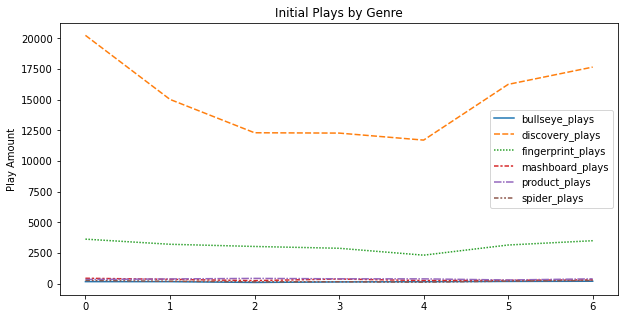

In [207]:
# Visualizing rate of initial plays for each genre

fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(data = daily_genre)
ax.set_ylabel('Play Amount')
ax.set_title('Initial Plays by Genre')
# plt.savefig('img/initial_plays_genre.png');
;

### Subsequent Play Rates

''

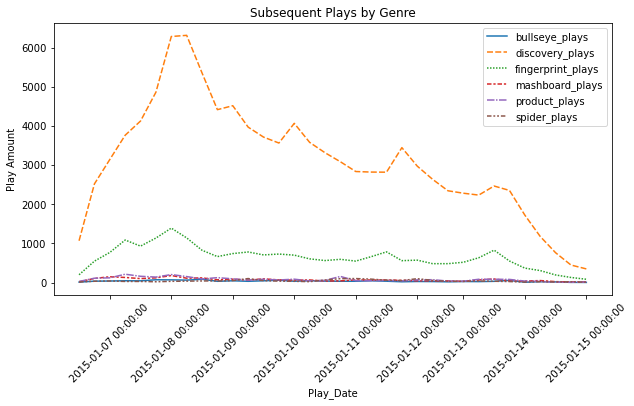

In [208]:
# Visualizing rate of secondary plays for each genre
# Reset the index here under a new variable to avoid issues later with the timeseries object
sub_index = sub_daily_genre.reset_index()
labels = sub_index['Play_Date']
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sub_daily_genre)
ax.set_ylabel('Play Amount')
ax.set_xticklabels(labels, rotation = 45)
ax.set_title('Subsequent Plays by Genre')
# plt.savefig('img/sub_plays_genre.png');
;

### Users by Genre

''

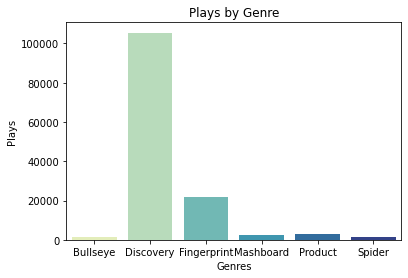

In [210]:
# Visualization of Users by Genre
genre_vals = r4.groupby('Genre')['ID'].count().values
genre_vis = ['Bullseye', 'Discovery', 'Fingerprint', 'Mashboard', 'Product', 'Spider']

fig, ax = plt.subplots()
sns.barplot(x = genre_vis, y = genre_vals, palette = 'YlGnBu')

ax.set_xlabel('Genres')
ax.set_ylabel('Plays')
ax.set_title('Plays by Genre')
# plt.savefig('img/plays_by_genre.png');
;

### 3D Plot of Genre Play Dates

In [101]:
# Visualizing Genres by First and subsequent play dates
date_genre_group = r4.groupby('Genre')['Play_Date'].count()
id_first_play_date = r4.groupby('Genre')['First_Play_Date'].count()

fig = px.scatter_3d(r4, x = genre_vis, y = genre_vals, z = id_first_play_date, color = date_genre_group, size_max=18, opacity=0.6,\
                   color_continuous_scale='jet')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

''

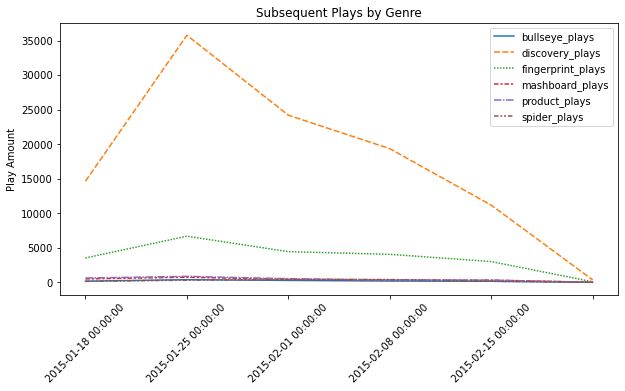

In [211]:
# Visualizing weekly change rate of initial and secondary plays for each genre
labels = genre_weekly['Play_Date']
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(data = genre_weekly)
ax.set_ylabel('Play Amount')
ax.set_xticklabels(labels, rotation = 45)
ax.set_title('Subsequent Plays by Genre')
# plt.savefig('img/weekly_plays_genre.png');
;